# Ports json to pandas

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (14, 10),})

In [2]:
metricDetails = df['metricDetails'][0]
metricDetails.keys()
metricDetails['1036']

{'description': 'The percentage of time that a port on a DS8000 system had depleted its send buffer credits.  That is, the percentage of time when the receiving port had no credit to provide to the port on the DS8000 system.',
 'name': 'Zero Send Buffer Credit Percentage',
 'units': '%'}

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_json('data1.json')
metricDetails = df['metricDetails'][0]
df.drop([0],inplace=True)
df.drop(columns=['metricDetails','resourceID','deviceId','startTime','endTime'],inplace=True)
df['split'] = df['deviceName'].str.split('<br />')
df['portName'] = df['split'].apply(lambda x: x[0])
df.deviceName = df.split.apply(lambda x: x[1])
df.drop(columns=['split'], inplace=True)
df[['componentId','metricId']] = df[['componentId','metricId']].astype('int32')
print(df.shape)
# Trvale nulová hodnota nás nezajíma...
df = df[df.maxValue > 0]
print(df.shape)
df.info()

(816, 10)
(234, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 810
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   componentId  234 non-null    int32  
 1   current      234 non-null    object 
 2   deviceName   234 non-null    object 
 3   label        234 non-null    object 
 4   maxValue     234 non-null    float64
 5   metricId     234 non-null    int32  
 6   minValue     234 non-null    float64
 7   precision    234 non-null    float64
 8   units        234 non-null    object 
 9   portName     234 non-null    object 
dtypes: float64(3), int32(2), object(5)
memory usage: 18.3+ KB


In [3]:
metrics = list(metricDetails.keys())
for m in metrics:
    print(m, metricDetails[m]['name'])

1036 Zero Send Buffer Credit Percentage
1037 Zero Receive Buffer Credit Percentage
852 Port Send I/O Rate
853 Port Receive I/O Rate
854 Total Port I/O Rate
858 Port Send Data Rate
859 Port Receive Data Rate
863 Port Send Response Time
864 Port Receive Response Time
866 Port Send Transfer Size
867 Port Receive Transfer Size
872 Error Frame Rate
874 Link Failure Rate
875 Loss of Sync Rate
876 Loss of Signal Rate
877 CRC Error Rate
887 Credit Recovery Link Reset Rate


In [47]:
pd.DataFrame(metricDetails).T

,description,name,units
1036,The percentage of time that a port on a DS8000...,Zero Send Buffer Credit Percentage,%
1037,The percentage of time that a port on a DS8000...,Zero Receive Buffer Credit Percentage,%
852,"Average number of send operations per second, ...",Port Send I/O Rate,ops/s
853,Average number of receive operations per secon...,Port Receive I/O Rate,ops/s
854,Average number of I/O operations processed per...,Total Port I/O Rate,ops/s
858,Average number of mebibytes (2^20 bytes) sent ...,Port Send Data Rate,MiB/s
859,Average number of mebibytes (2^20 bytes) recei...,Port Receive Data Rate,MiB/s
863,Average number of milliseconds that it took to...,Port Send Response Time,ms/op
864,Average number of milliseconds that it took to...,Port Receive Response Time,ms/op
866,Average number of kilobytes (2^10 bytes) sent ...,Port Send Transfer Size,KiB/op


In [54]:
metrics = pd.DataFrame(metricDetails).T['name'].index.to_list()

In [6]:
portNames = sorted(list(set(df.portName.to_list())))
for p in portNames:
    scalar = df[df['portName'] == p].iloc[0]['portName']
    print(scalar,end=' ')

0000 0001 0030 0031 0032 0033 0100 0101 0102 0103 0130 0131 0200 0201 0210 0211 0230 0231 0232 0233 0300 0301 0302 0303 0310 0311 0330 0331 

In [5]:
portNames = sorted(list(set(df.portName.to_list())))
metricId = np.array(list(set(df.metricId.to_list())), dtype=int)
for m in metricId:
    print(m)
    print(pd.DataFrame(df[df.metricId == m]['current'].to_list()[0], columns=['x']))


864
                  x
0     1585177202000
1     1585177261000
2     1585177321000
3     1585177381000
4     1585177442000
...             ...
1434  1585263241000
1435  1585263301000
1436  1585263361000
1437  1585263421000
1438  1585263600000

[1439 rows x 1 columns]
866
                  x
0     1585177202000
1     1585177261000
2     1585177321000
3     1585177381000
4     1585177442000
...             ...
1434  1585263241000
1435  1585263301000
1436  1585263361000
1437  1585263421000
1438  1585263600000

[1439 rows x 1 columns]
867
                  x
0     1585177202000
1     1585177261000
2     1585177321000
3     1585177381000
4     1585177442000
...             ...
1434  1585263241000
1435  1585263301000
1436  1585263361000
1437  1585263421000
1438  1585263600000

[1439 rows x 1 columns]
1036
                  x
0     1585177202000
1     1585177261000
2     1585177321000
3     1585177381000
4     1585177442000
...             ...
1434  1585263241000
1435  1585263301000
1436  15

In [7]:
portNames = sorted(list(set(df.portName.to_list())))

port_io = pd.DataFrame(df[(df['portName'] == portNames[0]) & (df.metricId == 854)]['current'].to_list()[0], columns=['x'])
port_io['time'] = port_io['x'].apply(lambda x: dt.datetime.fromtimestamp(x/1e3))
port_io.drop(columns=['x'], inplace=True)

for portName in portNames[1:]:
    port_io[portName] = pd.DataFrame(df[(df['portName'] == portName) & (df.metricId == 854)]['current'].to_list()[0], columns=['y'])

port_io.set_index('time', inplace=True)
port_io.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1439 entries, 2020-03-25 23:00:02 to 2020-03-26 23:00:00
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0001    1438 non-null   float64
 1   0030    1438 non-null   float64
 2   0031    1438 non-null   float64
 3   0032    1438 non-null   float64
 4   0033    1438 non-null   float64
 5   0100    1438 non-null   float64
 6   0101    1438 non-null   float64
 7   0102    1438 non-null   float64
 8   0103    1438 non-null   float64
 9   0130    1438 non-null   float64
 10  0131    1438 non-null   float64
 11  0200    1438 non-null   float64
 12  0201    1438 non-null   float64
 13  0210    1438 non-null   float64
 14  0211    1438 non-null   float64
 15  0230    1438 non-null   float64
 16  0231    1438 non-null   float64
 17  0232    1438 non-null   float64
 18  0233    1438 non-null   float64
 19  0300    1438 non-null   float64
 20  0301    1438 non-null   float64
 21  0

In [8]:
port_io

,0001,0030,0031,0032,0033,0100,0101,0102,0103,0130,...,0232,0233,0300,0301,0302,0303,0310,0311,0330,0331
time,,,,,,,,,,,,,,,,,,,,,
2020-03-25 23:00:02,25.05,4211.38,539.70,67.50,298.73,3163.45,488.57,74.03,286.93,461.42,...,1972.93,0.00,3463.13,380.10,1903.27,0.00,477.10,633.65,2068.62,159.02
2020-03-25 23:01:01,15.05,5629.23,72.90,10.73,32.52,4047.37,46.98,29.27,30.87,206.67,...,672.98,0.00,4098.45,163.23,656.08,0.00,213.35,747.25,2270.90,161.73
2020-03-25 23:02:01,505.25,3326.37,10.93,8.13,37.73,2502.98,7.58,10.70,32.00,286.70,...,605.67,0.55,2425.92,96.77,554.53,0.52,331.25,2606.55,6662.60,1244.38
2020-03-25 23:03:01,347.88,3660.95,29.43,6.23,17.13,2746.50,28.85,7.83,14.52,406.27,...,590.85,0.00,2829.78,129.35,588.45,0.00,423.58,3600.83,6071.10,3074.53
2020-03-25 23:04:02,287.97,3041.33,12.47,8.50,15.82,2311.72,12.82,9.58,15.33,425.28,...,599.03,0.00,2332.02,105.72,587.30,0.00,467.70,1394.53,1810.73,1071.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26 22:54:01,10.92,2701.18,17.32,8.57,12.60,2056.67,10.33,11.82,12.23,628.27,...,2357.52,0.00,1998.00,131.28,2228.08,0.00,722.95,6391.08,7748.23,6530.43
2020-03-26 22:55:01,24.92,2891.58,6.63,5.93,7.77,2153.50,3.60,9.10,7.58,800.13,...,2312.48,0.00,2138.03,589.13,2277.88,0.00,891.55,5094.02,6071.67,4609.77
2020-03-26 22:56:01,9.12,2642.05,7.05,4.42,7.13,2181.63,5.67,9.85,8.25,833.18,...,2264.57,0.00,2232.60,53.15,2352.98,0.00,888.47,3682.72,5256.52,3433.00


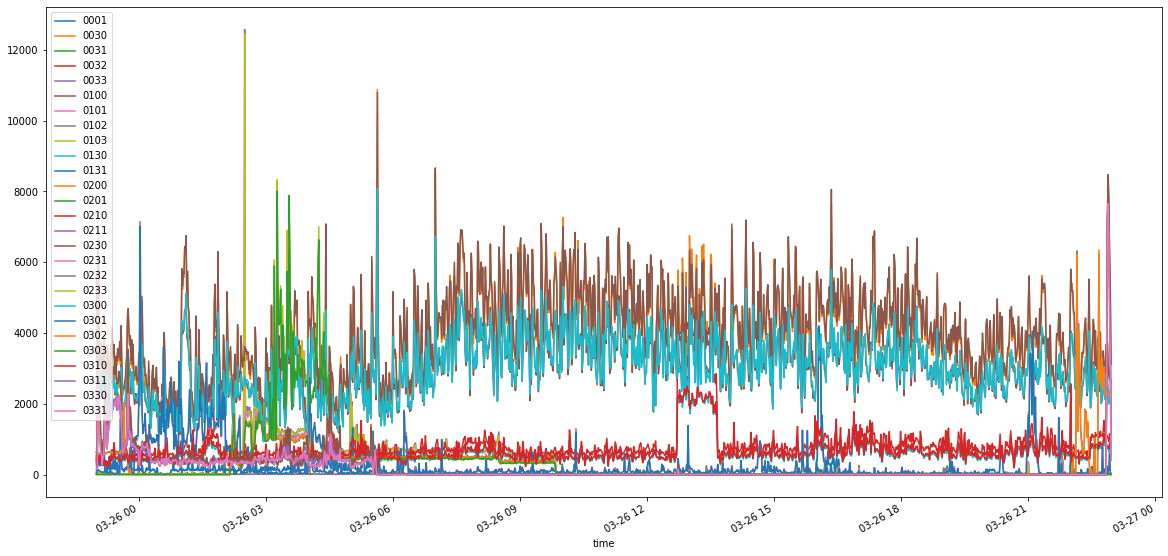

In [9]:
plt.rcParams.update({'figure.figsize': (20, 10),})
port_io.plot()

In [1]:
import json
import requests
adr = 'https://dl.boxcloud.com/d/1/b1!M2krUimm8uPjg85XvBvHFKCQBa81J-Wftp8SnWgisAZJaQbZ0bFPTiE1eSyq0EqgJrJKXGIse4cvOP6RqmlRRJ9axbiO6w_nwKR1kmpzKUh99rmcS279QamNnVKe7YIvXYikhKdoUrLJJhmsb13qYoGzojIsmx3CphX69aveaP6NGMK25nibgKJZqnMmc4sxWV9yBDm7QgUiyrD4jFXZHG2nioUiqdT6fOvnX96ra7-o-07vAsfVRqtWYKdGpajdMiCarpqVUIDvruWRo1rDF2AD7C4DLQx858c0mIRiRWiJxWI-cfsbwE6-Tcgx4AKaJC-82Ytb-oEUWgT3rc11Otz-AinMGf_5uSVT4061ad6d1sAzaYZYu7BwKE1ljq_mOtUQ189t1r3e17F2-GBkCxoZRwfVZw4_-gsLPp6DCz99Mw8JpliV0S7CAYJmlbKin5k8ebblUMToYmv_IDiCkqCSoKY5Rs-f_QhpvQcEMZ6LinVipUsWMlMVNWATLCqW6kZNdZED0IhCcOTBsmJe74gkTkLUB-atHtjrCnG27Dh0GpPHt5Sn2w3FGmhajNZorJ4bQycLJQSuZUQWV6BcnsCGdhOiMlQ0_u0IOstOLBItz_HaJTvQ4rsMknHe0OIXM3EMtLddhF_zNA3yHDNWYxZMpGPd9LHq1_HQijQimyhfXLXUier1Vn-ta5Bf5ZxC9r5bfKBTbPczHnKlz2-va7_lLbu0g488uamFy47HPDK2sRNkf5LVEE2i8yQOw5Whbd3holerzjit3IiiKJg1qFlbQrjY1DgEh01TFbe5R7VNrvE17p4UWxV7siBdutdgegV_kj2El3m9hhjk6khABX-TYBKmMrzDIhQCiuuQZsfXUElypZy6qDMIvO0WdREoFZSiwf-wObNUAaLxbuxnHhye7Z_VSreyKGJ6th1-h0bnB5CwCkk04tx8v2vbqmVXMfbkmVL1zfIspubu73BSw-bsmmZy-nBWN2D7INhTwjbeuhYgd57GTiADvJmqEUfj74mbNTj9Ww173Rnhp8V5Y7Nxy-eSE0z_jQerOMf6479XKaGuHjkQW9XfrvLmg-_WMP075HYZh1QNLR5K2eabN3f5OrUcnXoptZNj_1e-ywzWCN_qDX-MvSnDoC4POfppZKKsUbvlq2L4xKLFgtqhNUr4TngUoBZOKEE6kCeLNUgnm9PLKeOpc8_iatlj58xxC0SdnGBXNo6ezssZ_AmAJnIQxBg763_kmH2zZW8_fEuqVW5QqvNRzjhJaItTUtN0-HPSvGb3yXJ-PDLIelNnN792SRz_pG8-qdJrlgnnGACt5xYGyZvCRiDfVX7EBYravt_EPeG0jtXJO4EJyBM6SZwPpr8sRSUuAdJJCDW9pDoipoz_SBSm7NZ2mHiZ-hAT2VgSzg9PL0hbRtkxwkfZiVsug6N1bTW8KIf6Z8jPFCQCwg../download'
r = requests.get(adr)
r

<Response [200]>

In [ ]:
with open('data.json', 'w') as outfile:
    json.dump(r.json(), outfile)

In [5]:
!curl -O $adr -o "data.json"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36.4M  100 36.4M    0     0  20.1M      0  0:00:01  0:00:01 --:--:-- 20.1M
